<img src="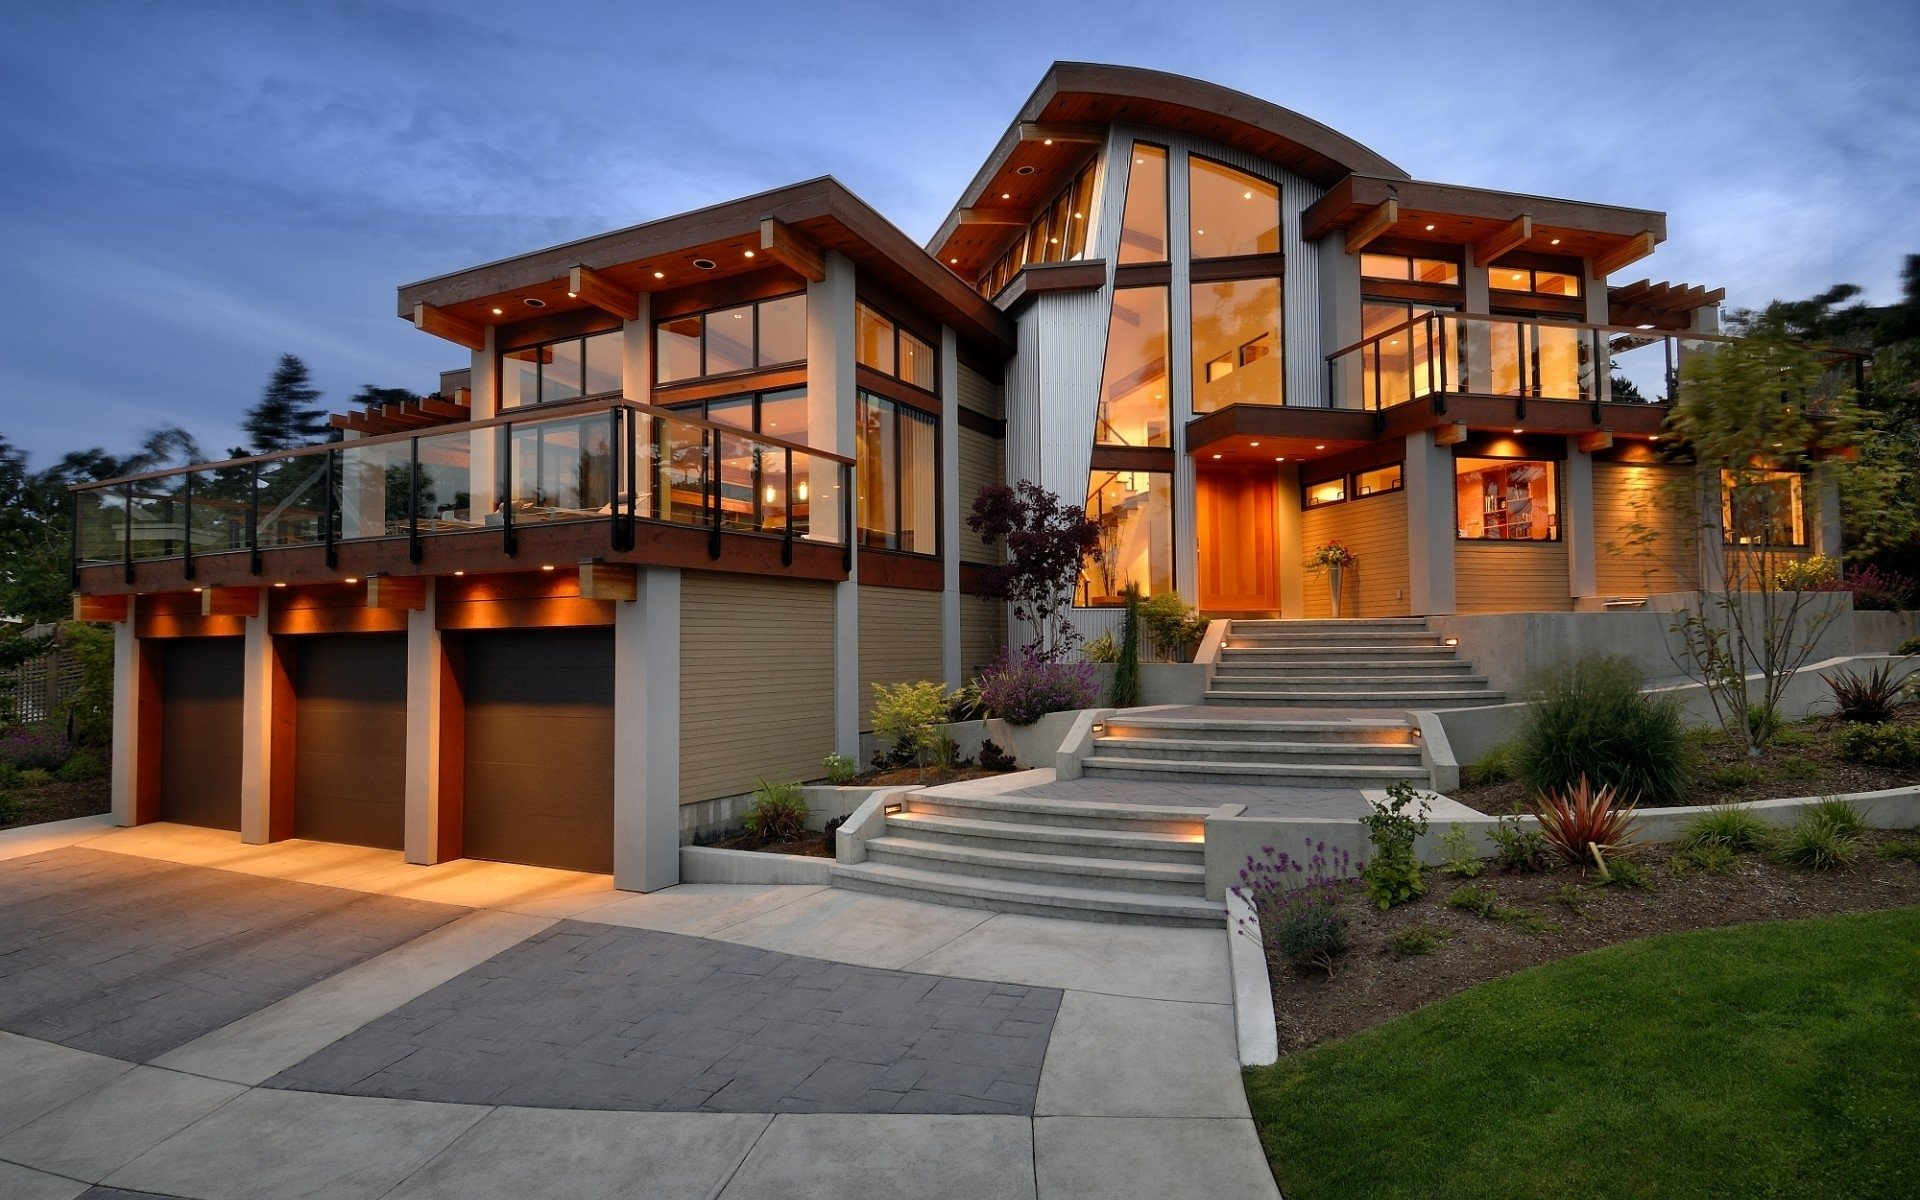
">

# Project: Predicting California Housing Prices

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* longitude             : A measure of how far west a house is; a higher value is farther west
* latitude              : A measure of how far north a house is; a higher value is farther north
* housing_median_age    : Median age of a house within a block; a lower number is a newer building
* total_rooms           : Total number of rooms within a block
* total_bedrooms        : Total number of bedrooms within a block
* population            : Total number of people residing within a block
* households            : Total number of households, a group of people residing within a home unit, for a block
* median_income         : Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* median_house_value    : Median house value for households within a block (measured in US Dollars)
* ocean_proximity       : Location of the house w.r.t ocean/sea

## Part A: Data Exploration


Import Libraries

In [2]:
import pandas as pd                                    #
import numpy as np                                     # to perform mathematical functions
import matplotlib.pyplot as plt                        #
import seaborn as sns                                  
sns.set_style('darkgrid')                              #setting seaborn visual style as 'darkgrid'
%matplotlib inline                                     
# to display the visuals within the notebook
import cufflinks as cf                                 # to create interactive dataframe visuals
cf.go_offline()                                        #
from sklearn.impute import SimpleImputer               # 
from sklearn.model_selection import train_test_split   #
from sklearn.linear_model import LinearRegression      # Model 1
from sklearn.svm import SVR                            # Model 2
from sklearn.tree import DecisionTreeRegressor         # Model 3
from sklearn.ensemble import RandomForestRegressor     # Model 4

In [3]:
housing = pd.read_csv('housing.csv')                   # Load the dataset

In [3]:
housing.shape                                          # Check the shape of the loaded dataset. Identify number of columns & rows

(20640, 10)

In [4]:
housing.head()                                         # Always a good practice to check the head of the data frame. It will
                                                       # give a quick overview of the data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe()                                     # A quick statisitcs summary of the dataset.   

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.info()                                         # A qucik summary of the data type of each column. Identify number of 
                                                       # missing values in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.index.values                                  # Check if each record in the dataset has a unique index value. This will
                                                      # be used to join, merge later in the process

array([    0,     1,     2, ..., 20637, 20638, 20639], dtype=int64)

In [8]:
housing.columns                                       # column names
num_features=housing.columns[:-1]                     # Save nummerical column names in a variable
cat_features=housing.columns[9:10]                    # Save categorical column names in a variable

In [9]:
corr_matrix = housing.corr()                          # This creates a correlation matrix between numerical columns of 
                                                      # the dataset
corr_matrix                                           # Target variable (median_house_value) is highly correlated to the 
                                                      # median_income and it totally makes sense

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [10]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
corr_matrix.iplot(kind='heatmap')                    # A better visulization of the above matrix

In [4]:
housing.iplot(kind='scatter', x='median_income', y='median_house_value',title = 'Median income vs House value',
              xTitle='Median Income (tens of thousands of US Dollars)', yTitle='Median House Value',mode='markers',size=5,
              categories='ocean_proximity')

In [5]:
housing.iplot(kind='scatter', x='longitude', y='latitude',title = 'A Geographical scatterplot of the houses',
            xTitle='longitude', yTitle='latitude',mode='markers',size=5,categories='ocean_proximity')

# Part B: Data Pre-Processing

In [14]:
housing["median_income"].iplot(kind='hist', bins=50)

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [16]:
housing["income_cat"].iplot(kind='hist',bins=10)

In [17]:
housing['rooms_per_household'] = housing['total_rooms']  / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [18]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [19]:
housing.drop('rooms_per_household', axis = 1, inplace = True)
housing.drop('bedrooms_per_room', axis = 1, inplace = True)
housing.drop('population_per_household', axis = 1, inplace = True)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train = housing.loc[train_index]
    test = housing.loc[test_index]

In [21]:
train.drop('income_cat', axis = 1, inplace = True)
test.drop('income_cat', axis = 1, inplace = True)
housing.drop('income_cat', axis = 1, inplace = True)

In [22]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8577,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316,500001.0,<1H OCEAN
5960,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844,203000.0,INLAND
4753,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130,192500.0,<1H OCEAN
15423,-117.26,33.20,13.0,3163.0,725.0,1675.0,629.0,2.8214,121900.0,<1H OCEAN
9788,-120.51,35.91,39.0,768.0,162.0,264.0,118.0,5.3245,250000.0,INLAND


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_pipeline   = Pipeline([
                                 ('imputer', SimpleImputer(strategy='median')),
                                 ('feature_scaling', StandardScaler())
                                ])


categorical_pipeline = Pipeline([('Dummy_Variables', OneHotEncoder())])

full_pipeline        = ColumnTransformer([
                                   ("Numerical", numerical_pipeline, num_features),
                                   ("Categorical", OneHotEncoder(), cat_features)
                                  ])

train_prepared       = full_pipeline.fit_transform(train)

In [24]:
final_columns=housing.columns[:-1].append(pd.get_dummies(housing['ocean_proximity']).columns)

In [25]:
final_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [26]:
train_prepared = pd.DataFrame(train_prepared, columns=final_columns)

In [27]:
train_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.580737,-0.817622,0.179523,-0.557719,-0.516496,-0.660689,-0.436930,1.773271,2.534374,1.0,0.0,0.0,0.0,0.0
1,0.870283,-0.714454,0.020470,0.027011,-0.231799,0.063183,-0.133760,0.586744,-0.035857,0.0,1.0,0.0,0.0,0.0
2,0.620674,-0.747280,0.179523,-0.716720,-0.684394,-0.411325,-0.681593,-0.506961,-0.126724,1.0,0.0,0.0,0.0,0.0
3,1.154837,-1.141197,-1.251947,0.258457,0.468992,0.234509,0.355567,-0.555326,-0.737693,1.0,0.0,0.0,0.0,0.0
4,-0.467620,0.129653,0.815731,-0.868195,-0.900958,-1.031146,-1.003379,0.766318,0.370878,0.0,1.0,0.0,0.0,0.0


In [28]:
train_prepared.drop('INLAND', axis = 1, inplace = True)

In [29]:
train_prepared.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [30]:
x_train=train_prepared[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income',
                    '<1H OCEAN', 'ISLAND', 'NEAR BAY','NEAR OCEAN']]
y_train=train_prepared['median_house_value']

In [31]:
test_prepared     = full_pipeline.fit_transform(test)
test_prepared     = pd.DataFrame(test_prepared, columns=final_columns)
test_prepared.drop('INLAND', axis = 1, inplace = True)
x_test=test_prepared[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income',
                    '<1H OCEAN', 'ISLAND', 'NEAR BAY','NEAR OCEAN']]
y_test=test_prepared['median_house_value']

# Part C: Model Selection

Here we select a few suitable Machine learning algorithm model for the problem and select a better fit model eventually

## Model 1: Linear Regression

In [32]:
LR = LinearRegression()
LR.fit(x_train,y_train)
Predictions_LR=LR.predict(x_test)

#### Model Evaluation Metrics: Lower the follwoing error better the model fit is

In [34]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, Predictions_LR))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, Predictions_LR))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test, Predictions_LR)))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
print('\n')
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Mean Absolute Error: 0.43311076286943057
Mean Squared Error: 0.3502102367085475
Root Mean Square Error: 0.591785634084292


Scores: [-0.33522305 -0.41852471 -0.31442482 -0.37697003 -0.3547324  -0.35916447
 -0.36790401 -0.31993958 -0.37127465 -0.37683802]
Mean: -0.35949957480638767
Standard deviation: 0.029168487866872712


#### Make sure if the linear model is correct for this dataset. A normally distributed histogram of residuals suggests that a linear model is a good choice

In [35]:
(y_test-Predictions_LR).iplot(kind='hist')  # Linear model is indeed a right choice for this dataset

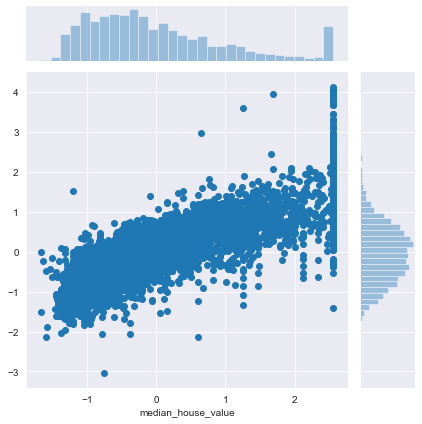

In [36]:
sns.jointplot(x=y_test,y=LR.predict(x_test), kind='scatter') # Another way to make sure if its a right model. 
                                                             # A straight line suggests that it is a linear model

## Model 2: Decison Tree

In [38]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
Predictions_DT=DT.predict(x_test)

In [39]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, Predictions_DT))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, Predictions_DT))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test, Predictions_DT)))

scores_DT = cross_val_score(DT, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
print('\n')
print("Scores:", scores_DT)
print("Mean:", scores_DT.mean())
print("Standard deviation:", scores_DT.std())

Mean Absolute Error: 0.3930374567938788
Mean Squared Error: 0.3720548768470637
Root Mean Square Error: 0.6099630126877069


Scores: [-0.36647838 -0.45885841 -0.37876342 -0.44840732 -0.37880664 -0.38603908
 -0.42540244 -0.36908868 -0.41542614 -0.44023916]
Mean: -0.4067509663571792
Standard deviation: 0.033209234045997404


## Model 3: Random Forest

In [40]:
RF = RandomForestRegressor(random_state=42)
RF.fit(x_train,y_train)
Predictions_RF=RF.predict(x_test)

C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [41]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, Predictions_RF))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, Predictions_RF))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test, Predictions_RF)))

scores_RF = cross_val_score(RF, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
print('\n')
print("Scores:", scores_RF)
print("Mean:", scores_RF.mean())
print("Standard deviation:", scores_RF.std())

Mean Absolute Error: 0.308228032850799
Mean Squared Error: 0.21621349298359346
Root Mean Square Error: 0.46498762669945687


Scores: [-0.21263668 -0.22367057 -0.17773131 -0.21819359 -0.23003018 -0.21979296
 -0.2302626  -0.19419907 -0.21559728 -0.23071273]
Mean: -0.21528269831405447
Standard deviation: 0.016250755231532125


## Model 4: Support Vector Regression

In [42]:
SV = SVR(kernel='linear')
SV.fit(x_train,y_train)
Predictions_SV=SV.predict(x_test)

In [43]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, Predictions_SV))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, Predictions_SV))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test, Predictions_SV)))

scores_SV = cross_val_score(SV, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
print('\n')
print("Scores:", scores_SV)
print("Mean:", scores_SV.mean())
print("Standard deviation:", scores_SV.std())

Mean Absolute Error: 0.4218453677441278
Mean Squared Error: 0.3627660669292339
Root Mean Square Error: 0.6023006449683032


Scores: [-0.34369519 -0.40939966 -0.32281703 -0.39491492 -0.36723568 -0.37049154
 -0.38779392 -0.33120511 -0.38299286 -0.39584104]
Mean: -0.37063869454673215
Standard deviation: 0.027844760179718746


It looks like Random Forest seems to be the clear winner. The next step is to fine tune the model

## Part D: Fine tuning the model

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = [{'n_estimators': [3, 10, 30, 40], 'max_features': [2, 4, 6, 8]}]

In [46]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,scoring='neg_mean_squared_error')

In [47]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [48]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
RF = grid_search.best_estimator_
RF.fit(x_train,y_train)
Predictions_RF=RF.predict(x_test)


print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, Predictions_RF))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, Predictions_RF))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test, Predictions_RF)))

scores_RF = cross_val_score(RF, x_train, y_train,scoring="neg_mean_squared_error", cv=10)
print('\n')
print("Scores:", scores_RF)
print("Mean:", scores_RF.mean())
print("Standard deviation:", scores_RF.std())

Mean Absolute Error: 0.28824773852584346
Mean Squared Error: 0.18997939425299742
Root Mean Square Error: 0.43586625730032996


Scores: [-0.18005188 -0.1994893  -0.15534108 -0.19177843 -0.19441247 -0.18281065
 -0.19683071 -0.16487633 -0.19918587 -0.20509719]
Mean: -0.1869873903730666
Standard deviation: 0.015375227772130467


In [50]:
scalerY = StandardScaler().fit(train['median_house_value'].values.reshape(-1, 1))
p=scalerY.inverse_transform(Predictions_RF)

In [57]:
p[3]

83110.00000000004

In [58]:
scalerY.inverse_transform(y_test)[3]

77149.64982563439